In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
ipl = pd.read_csv('ipl_2022_dataset.csv')

In [3]:
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,2022 Squad RCB,player,COST IN $ (000)
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,NaN,NaN,NaN
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,NaN,NaN,NaN
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,NaN,NaN,NaN
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,NaN,NaN,NaN
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,NaN,NaN,NaN


In [4]:
1

1

In [5]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           588 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
 8   2022 Squad RCB   22 non-null     object 
 9   player           23 non-null     object 
 10  COST IN $ (000)  0 non-null      float64
dtypes: float64(3), int64(1), object(7)
memory usage: 54.5+ KB


In [6]:
ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team', '2022 Squad RCB', 'player',
       'COST IN $ (000)'],
      dtype='object')

In [7]:
ipl.drop('Unnamed: 0', axis=1, inplace= True)

In [8]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,2022 Squad RCB,player,COST IN $ (000)
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,NaN,NaN,NaN
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,NaN,NaN,NaN
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,NaN,NaN,NaN
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,NaN,NaN,NaN
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,NaN,NaN,NaN


In [9]:
ipl[ipl['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,2022 Squad RCB,player,COST IN $ (000)
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold,NaN,NaN,NaN
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold,NaN,NaN,NaN
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold,NaN,NaN,NaN
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold,NaN,NaN,NaN
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold,NaN,NaN,NaN
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,NaN,NaN,NaN
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,NaN,NaN,NaN
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,NaN,NaN,NaN


In [10]:
ipl['COST IN ₹ (CR.)'] = ipl['COST IN ₹ (CR.)'].fillna(0)
ipl['Cost IN $ (000)'] = ipl['Cost IN $ (000)'].fillna(0)

In [11]:
ipl['2021 Squad'] = ipl['2021 Squad'].fillna('Not Participated')

In [12]:
ipl.isnull().sum()

,0
Player,45
Base Price,0
TYPE,0
COST IN ₹ (CR.),0
Cost IN $ (000),0
2021 Squad,0
Team,0
2022 Squad RCB,611
player,610
COST IN $ (000),633


In [13]:
teams = ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore ',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [14]:
ipl['status'] = ipl['Team'].replace(teams,'sold')

In [15]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,2022 Squad RCB,player,COST IN $ (000),status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,NaN,NaN,NaN,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,NaN,NaN,NaN,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,NaN,NaN,NaN,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,NaN,NaN,NaN,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,NaN,NaN,NaN,sold


In [16]:
ipl[ipl['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,2022 Squad RCB,player,COST IN $ (000),status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,NaN,NaN,NaN,sold
168,NaN,Retained,BATTER,15.00,1950.0,RCB,Royal Challengers Bangalore,Virat Kohli,NaN,NaN,sold
169,NaN,Retained,ALL-ROUNDER,11.00,1430.0,RCB,Royal Challengers Bangalore,Glenn Maxwell,NaN,NaN,sold
170,NaN,1 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,Wanindu Hasaranga,NaN,NaN,sold
171,NaN,2 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,Harshal Patel,NaN,NaN,sold
172,NaN,2 Cr,BOWLER,7.75,1007.5,CSK,Royal Challengers Bangalore,Josh Hazlewood,NaN,NaN,sold
173,NaN,2 Cr,BATTER,7.00,910.0,CSK,Royal Challengers Bangalore,Faf Du Plessis,NaN,NaN,sold
174,NaN,Retained,BOWLER,7.00,910.0,RCB,Royal Challengers Bangalore,Mohammed Siraj,NaN,NaN,sold
175,NaN,2 Cr,WICKETKEEPER,5.50,715.0,KKR,Royal Challengers Bangalore,Dinesh Karthik,NaN,NaN,sold
176,NaN,20 Lakh,WICKETKEEPER,3.40,442.0,RR,Royal Challengers Bangalore,Anuj Rawat,NaN,NaN,sold


In [17]:
# How many players have participated in 2022 IPL Auction?

ipl.shape[0]

633

In [18]:
# How many types of players have participated?

types = ipl['TYPE'].value_counts()
types.reset_index()

,TYPE,count
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

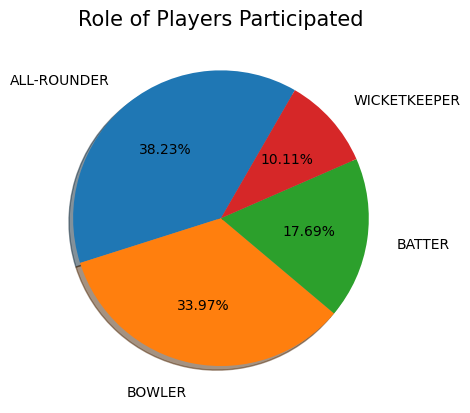

In [19]:
plt.pie(types.values, labels=types.index,labeldistance=1.2,autopct='%1.2f%%', shadow=True, startangle=60)
plt.title('Role of Players Participated', fontsize = 15)
plt.plot()

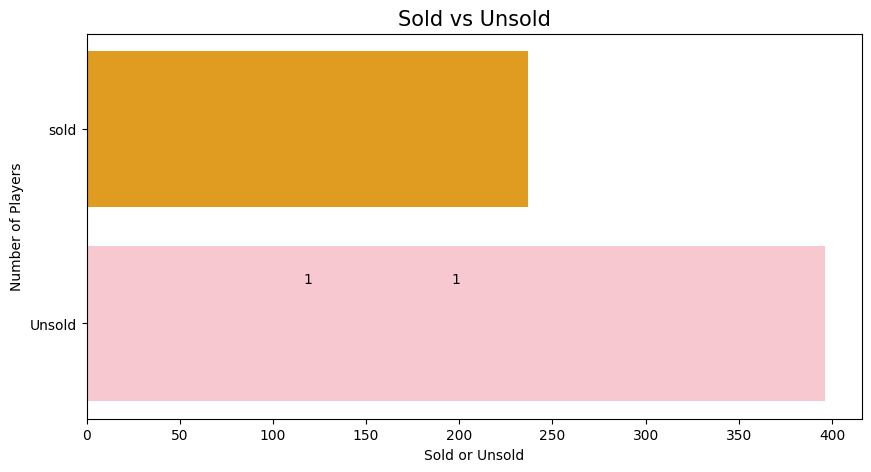

In [20]:
# Players sold and unsold using a bar graph.

plt.figure(figsize=(10,5))
fig = sns.countplot(ipl['status'],palette=['orange','Pink'])
plt.xlabel('Sold or Unsold') # Corrected line
plt.ylabel('Number of Players') # Corrected line
plt.title('Sold vs Unsold', fontsize=15)
plt.plot()

for p in fig.patches:
  fig.annotate(format(p.get_height(), '.0f'), (p.get_x() +
  p.get_width()/2., p.get_height()), ha = 'center', va = 'center',
  xytext = (0,4), textcoords = 'offset points')

In [21]:
ipl.groupby('status')['status'].size()
#or
ipl.groupby('status')['Team'].count()

,Team
status,
Unsold,396
sold,237


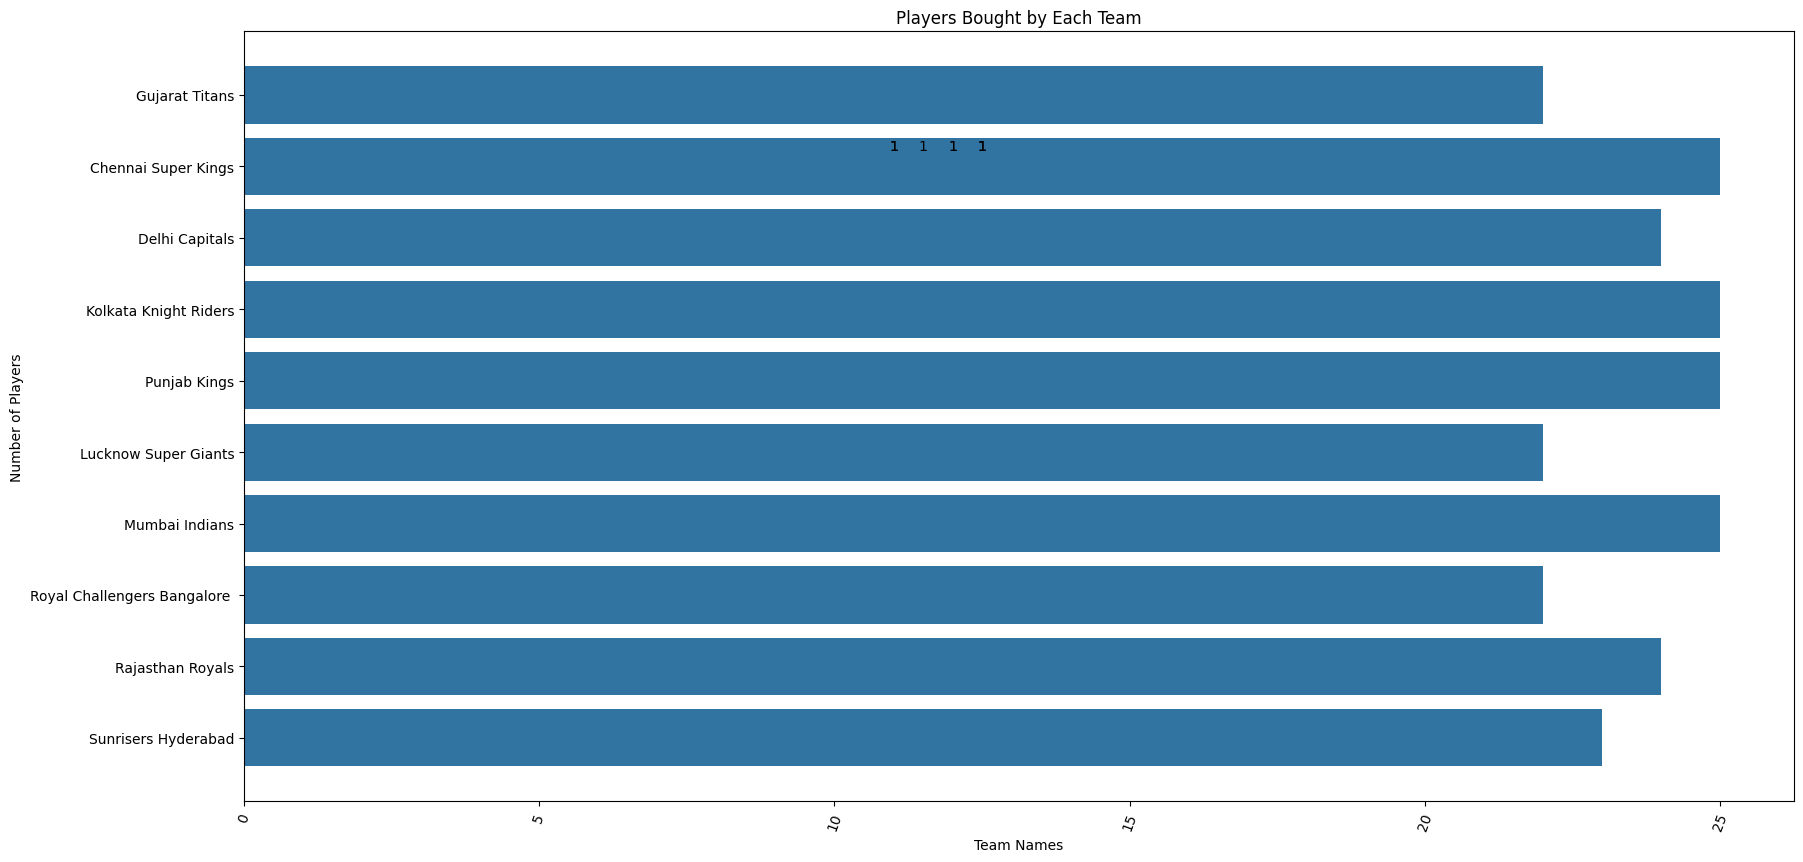

In [22]:
# Total number of players bought by each team.

plt.figure(figsize=(20,10))
fig = sns.countplot(ipl[ipl['Team'] != 'Unsold']['Team']) # Corrected line
plt.xlabel('Team Names')
plt.ylabel('Number of Players')
plt.title('Players Bought by Each Team', fontsize=12)
plt.xticks(rotation=70)
plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 4), textcoords='offset points') # Corrected line

In [23]:
ipl['retention'] = ipl['Base Price']

In [24]:
ipl['retention'].replace(['2 Cr','40 Lakh', '20 Lakh','1 Cr', '75 Lakh', '50 Lakh', '30 lakh','1.5 Cr'],'Form Auction', inplace = True)

In [25]:
# Treating Base Price

ipl['Base Price'].replace('Draft Pick',0, inplace = True)

In [26]:
ipl['base_price_unit'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[-1])
ipl['base_price'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[0])

In [27]:
ipl['Base Price'].replace('Retained',0, inplace = True)

In [28]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,2022 Squad RCB,player,COST IN $ (000),status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,NaN,NaN,NaN,sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,NaN,NaN,NaN,sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,NaN,NaN,NaN,sold,Form Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,NaN,NaN,NaN,sold,Form Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,NaN,NaN,NaN,sold,Draft Pick,0,0


In [29]:
# Total players retained and bought
ipl.groupby(['Team', 'retention'])['retention'].count()[:-1]

Team                          retention   
Chennai Super Kings           30 Lakh          1
                              Form Auction    20
                              Retained         4
Delhi Capitals                Form Auction    20
                              Retained         4
Gujarat Titans                30 Lakh          1
                              Draft Pick       3
                              Form Auction    18
Kolkata Knight Riders         30 Lakh          1
                              Form Auction    20
                              Retained         4
Lucknow Super Giants          Draft Pick       3
                              Form Auction    19
Mumbai Indians                30 Lakh          1
                              Form Auction    20
                              Retained         4
Punjab Kings                  Form Auction    23
                              Retained         2
Rajasthan Royals              30 Lakh          1
                              Form Auction    20
                              Retained         3
Royal Challengers Bangalore   30 Lakh          1
                              Form Auction    18
                              Retained         3
Sunrisers Hyderabad           Form Auction    20
                              Retained         3
Unsold                        30 Lakh          3
Name: retention, dtype: int64

[]

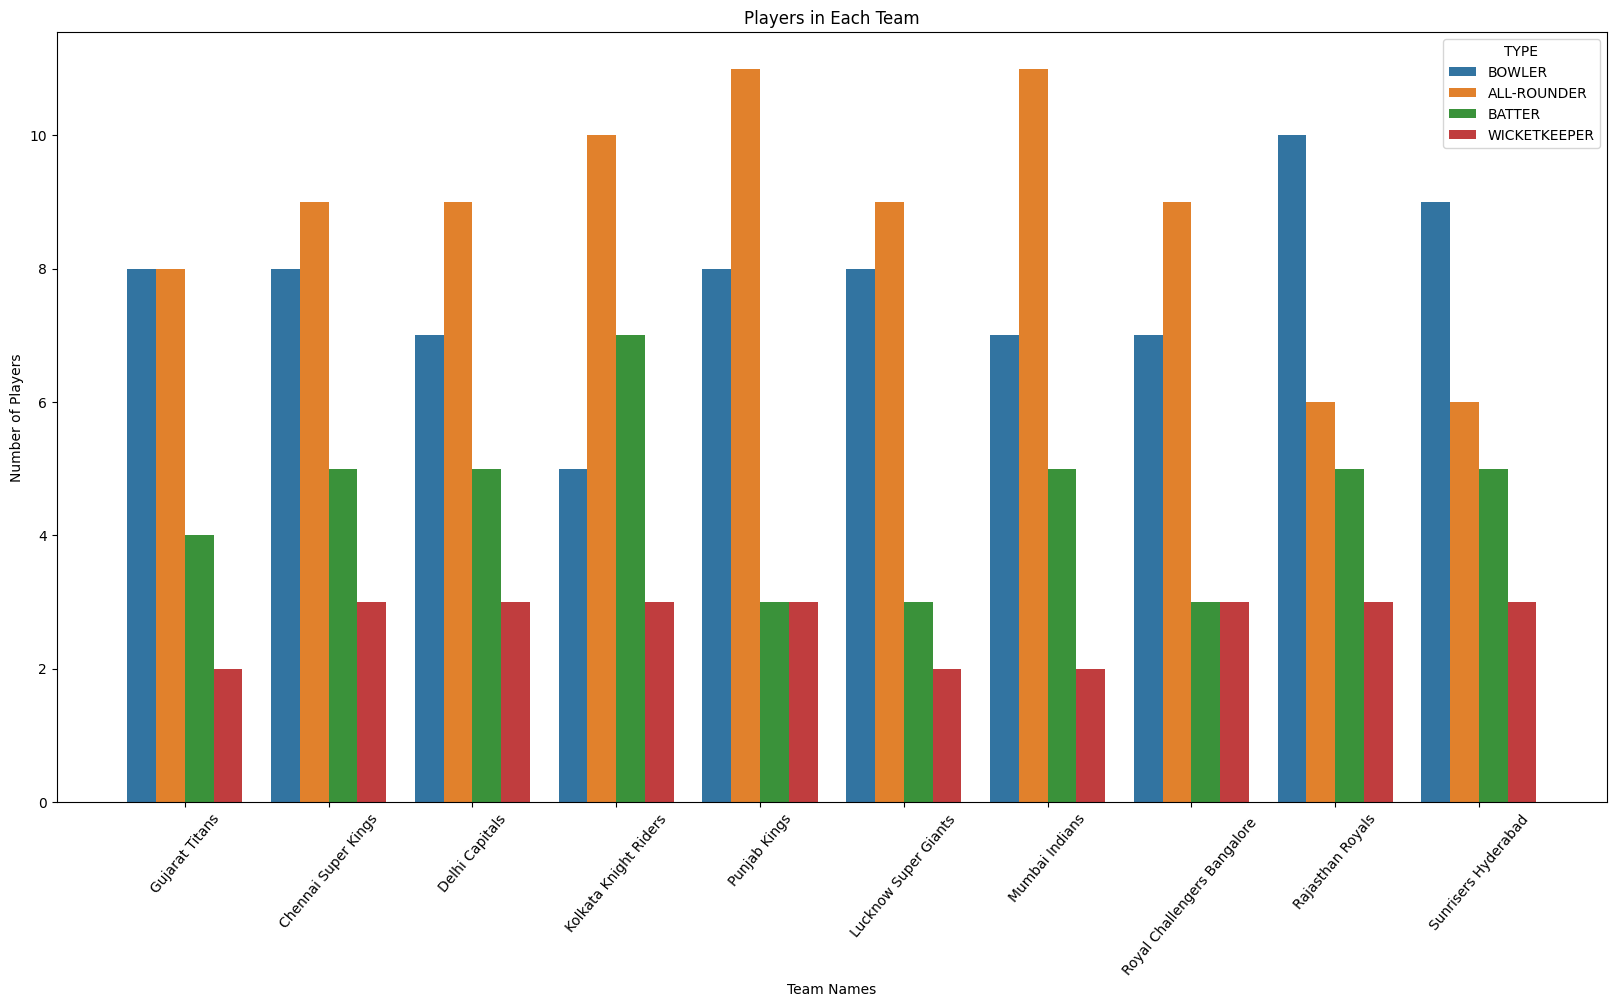

In [30]:
plt.figure(figsize=(20,10))
fig = sns.countplot(x='Team', hue='TYPE', data=ipl[ipl['Team'] != 'Unsold'])
plt.title('Players in Each Team')
plt.xlabel('Team Names')
plt.ylabel('Number of Players')
plt.xticks(rotation=50)
plt.plot() # or plt.show()

In [31]:
# Highest amount spent on a single player by each team

ipl[ipl['retention']=='From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:1].sort_values(ascending=False)

,COST IN ₹ (CR.)
Team,


In [34]:
# Player retained at maximum price.

ipl[ipl['retention']=='Retained'].sort_values(by = 'COST IN ₹ (CR.)', ascending=False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,2022 Squad RCB,player,COST IN $ (000),status,retention,base_price_unit,base_price
22,Ravindra Jadeja,0,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,NaN,NaN,NaN,sold,Retained,Retained,Retained


In [38]:
# Top 5 Bowlers

ipl[(ipl['retention']=='From Auction') & (ipl['TYPE']=='Bowler')].sort_values(by = 'COST IN ₹ (CR.)', ascending=False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,2022 Squad RCB,player,COST IN $ (000),status,retention,base_price_unit,base_price


In [39]:
# Top 5 All Rounder

ipl[(ipl['retention']=='From Auction') & (ipl['TYPE']=='ALL-ROUNDER')].sort_values(by = 'COST IN ₹ (CR.)', ascending=False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,2022 Squad RCB,player,COST IN $ (000),status,retention,base_price_unit,base_price


In [40]:
ipl = ipl.rename(columns={'2021 Squad':'prev_team'})

In [43]:
unsold_players = ipl[(ipl.prev_team != 'Not Participated') & (ipl.Team == 'Unsold')][['Player','prev_team']]

In [44]:
print(unsold_players)

                      Player prev_team
237             Suresh Raina       CSK
238              Steve Smith        DC
239          Shakib Al Hasan       KKR
240              Amit Mishra        DC
241              Adil Rashid      PBKS
242              Imran Tahir       CSK
243            Mujeeb Zadran       SRH
244               Adam Zampa       RCB
245            Rajat Patidar       RCB
246     Mohammed Azharuddeen       RCB
249             M. Siddharth        DC
252              Dawid Malan      PBKS
253              Eoin Morgan       KKR
254        Cheteshwar Pujara       CSK
255           Saurabh Tiwary        MI
257            Ishant Sharma        DC
259            Piyush Chawla        MI
260           Tabraiz Shamsi        RR
262              Sachin Baby       RCB
267              Virat Singh       SRH
269              Akash Singh        RR
273               Chris Lynn        MI
276            George Garton       RCB
288               Andrew Tye        RR
289          Sandeep Warr